<a href="https://colab.research.google.com/github/Grodelek/AI_Laboratoria/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)
observations=100000
xs = np.random.uniform(low=-10,high=10,size = (observations,1))
zs = np.random.uniform(low=-10,high=10,size=(observations,1))
inputs=np.column_stack((xs,zs))
print(inputs.shape)

2.18.0
(100000, 2)


In [ ]:
noise = np.random.uniform(low=-1,high=1,size=(observations,1))
targets = 13 * xs + 7 * zs - 12 + noise
np.savez('TF_dataset',inputs=inputs,targets=targets)
print(targets.shape)

(100000, 1)


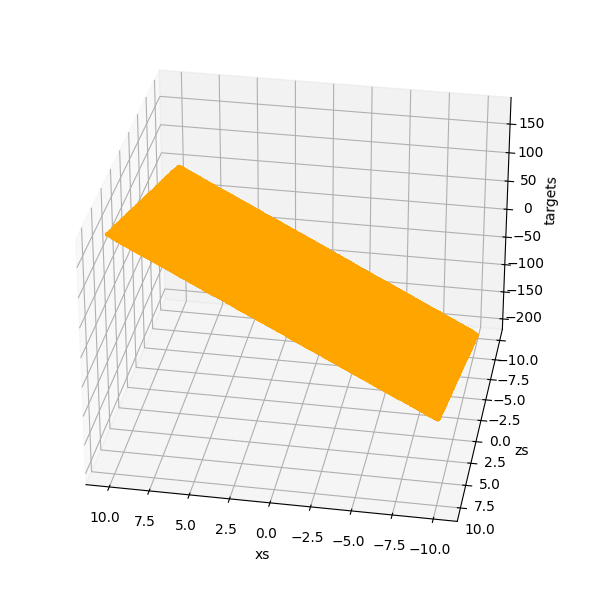

In [ ]:
observations = xs.shape[0]

xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
targets = targets.reshape(observations,)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, zs, targets, color='orange', linewidth=2)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')
ax.view_init(elev=30, azim=100)
plt.tight_layout()
plt.show()


In [ ]:
init_range = 0.1
weights = np.random.uniform(low=-init_range,high=init_range, size=(2,1))
biases = np.random.uniform(low=-init_range,high=init_range, size=1)
print(weights,biases)

[[-0.01773616]
 [ 0.09412194]] [0.0702586]


In [ ]:
targets = targets.reshape(observations,1)
eta = 0.01
for i in range(100):
  outputs = np.dot(inputs,weights) + biases
  deltas = outputs - targets

  loss=np.sum(deltas ** 2)/2/observations
  print(loss)

  deltas_scaled = deltas/observations
  weights = weights - eta * np.dot(inputs.T, deltas_scaled)
  biases = biases - eta * np.sum(deltas_scaled)

3688.576921179546
1681.1540734955597
786.6635272424157
387.67019472929894
209.29059944643234
129.1450945328289
92.7490892780136
75.84521607032049
67.63350568650691
63.30536872520729
60.71966250623744
58.92283947711003
57.49009689092868
56.23204569974932
55.06411381143671
53.94840145169636
52.867793635300856
51.814434229796944
50.78459416476445
49.77638649571235
48.78874897716614
47.820990975212126
46.87259164626489
45.943109991140666
45.03214472242283
44.13931631261371
43.2642589198752
42.40661671338308
41.566042159207015
40.742195180676596
39.93474270964129
39.143358413269816
38.36772250047193
37.60752156520492
36.862448447606226
36.13220210443897
35.41648748503167
34.715015410985416
34.02750245885283
33.35367084540937
32.69324831532217
32.0459680311053
31.411568465287957
30.789793294738104
30.18039129709382
29.583116249257735
28.997726827912107
28.423986512014064
27.861663487231386
27.31053055228014
26.77036502712604
26.24094866301264
25.72206755428013
25.213512051938668
24.715076678